## Understanding the problem

Customer churn (or just Churn) is the term used to describe the situation when customers stop using a product or service provided by a business. In other words, it's the rate at which customers discontinue their relationship with a company.

Churn is a significant concern for businesses because losing customers can impact revenue and growth. Customer churn can occur for various reasons, such as dissatisfaction, better offers from competitors, or changing needs. 

Predicting and understanding customer churn is crucial for businesses to implement strategies to retain customers and maintain a healthy customer base.

## Metadata

Data Source: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

## Import base modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the data

In [2]:
train_df = pd.read_csv('./datasets/training.csv')
test_df = pd.read_csv('./datasets/testing.csv')
df = pd.concat([train_df, test_df]).drop("CustomerID", axis=1)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
df.shape

(505207, 11)

## Preprocessing

### Missing values

In [4]:
df.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop the null row
df1 = df.dropna()
df1.shape

(505206, 11)

### Duplicates

In [7]:
df1[df1.duplicated()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


### Format

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                505206 non-null  float64
 1   Gender             505206 non-null  object 
 2   Tenure             505206 non-null  float64
 3   Usage Frequency    505206 non-null  float64
 4   Support Calls      505206 non-null  float64
 5   Payment Delay      505206 non-null  float64
 6   Subscription Type  505206 non-null  object 
 7   Contract Length    505206 non-null  object 
 8   Total Spend        505206 non-null  float64
 9   Last Interaction   505206 non-null  float64
 10  Churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


In [9]:
def show_all_unique_values(df):
    for col in df.columns:
        statement = f"{col}: {df[col].unique()}"
        print(statement)

show_all_unique_values(df1)

Age: [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]
Gender: ['Female' 'Male']
Tenure: [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]
Usage Frequency: [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10.]
Support Calls: [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8.]
Payment Delay: [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19.]
Subscription Type: ['Standard' 'Basic' 'Premium']
Contract Length: ['Annual' 'Monthly' 'Quarterly']
Total Spend: [932.   557.   185.   ... 829.59 804.3  959.47]
Last Interaction

### Categorical data conversion

In [10]:
# For Gender, we'll use basic method which is 1 and 0
df1["Gender"] = df1.Gender.apply(lambda value: 1. if value == "Male" else 0.)
df1.Gender.unique()

array([0., 1.])

In [11]:
# For Subscription Type and Contract Length, we'll use One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ["Subscription Type", "Contract Length"]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df1[cols_to_encode])
encoded_data

array([[0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.]])

In [12]:
encoded_df = pd.DataFrame(data=encoded_data, columns=["Basic", "Prenium", "Standard", "Annual", "Monthly", "Quarterly"])
df2 = pd.concat([df1.drop(cols_to_encode, axis=1).reset_index(drop=True), encoded_df], axis=1)
df2.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Basic,Prenium,Standard,Annual,Monthly,Quarterly
0,30.0,0.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65.0,0.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55.0,0.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58.0,1.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23.0,1.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
df2.shape

(505206, 15)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505206 entries, 0 to 505205
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               505206 non-null  float64
 1   Gender            505206 non-null  float64
 2   Tenure            505206 non-null  float64
 3   Usage Frequency   505206 non-null  float64
 4   Support Calls     505206 non-null  float64
 5   Payment Delay     505206 non-null  float64
 6   Total Spend       505206 non-null  float64
 7   Last Interaction  505206 non-null  float64
 8   Churn             505206 non-null  float64
 9   Basic             505206 non-null  float64
 10  Prenium           505206 non-null  float64
 11  Standard          505206 non-null  float64
 12  Annual            505206 non-null  float64
 13  Monthly           505206 non-null  float64
 14  Quarterly         505206 non-null  float64
dtypes: float64(15)
memory usage: 57.8 MB


### Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_to_scale = df2.iloc[:, :8].drop("Gender", axis=1)
df2[data_to_scale.columns] = scaler.fit_transform(data_to_scale)
df3 = df2.copy()

In [16]:
df3.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Basic,Prenium,Standard,Annual,Monthly,Quarterly
0,0.255319,0.0,0.644068,0.448276,0.5,0.600000,0.924444,0.551724,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.000000,0.0,0.813559,0.000000,1.0,0.266667,0.507778,0.172414,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.787234,0.0,0.220339,0.103448,0.6,0.600000,0.094444,0.068966,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.851064,1.0,0.627119,0.689655,0.7,0.233333,0.328889,0.965517,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.106383,1.0,0.525424,0.655172,0.5,0.266667,0.574444,0.655172,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
df3.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Basic,Prenium,Standard,Annual,Monthly,Quarterly
0,0.255319,0.0,0.644068,0.448276,0.5,0.600000,0.924444,0.551724,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.000000,0.0,0.813559,0.000000,1.0,0.266667,0.507778,0.172414,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.787234,0.0,0.220339,0.103448,0.6,0.600000,0.094444,0.068966,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.851064,1.0,0.627119,0.689655,0.7,0.233333,0.328889,0.965517,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.106383,1.0,0.525424,0.655172,0.5,0.266667,0.574444,0.655172,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df3.shape

(505206, 15)

### Split into X and y

In [19]:
data = df3.copy()

In [20]:
X = data.drop("Churn", axis=1)
y = data.Churn

### Class balance

In [21]:
y.value_counts()

Churn
1.0    280492
0.0    224714
Name: count, dtype: int64

In [22]:
churn = len(y[y == 1])
no_churn = len(y[y == 0])
total = len(y)

percent_churn = round(churn*100/total, 2)
percent_no_churn = round(no_churn*100/total, 2)

print(f"Churn: {percent_churn}%")
print(f"No Churn: {percent_no_churn}%")

Churn: 55.52%
No Churn: 44.48%


In [24]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy="minority", random_state=10)
X_res, y_res = sm.fit_resample(X, y)

y_res.value_counts()

Churn
1.0    280492
0.0    280492
Name: count, dtype: int64

### Split into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=10, stratify=y_res)

## Model building

In [43]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy
from keras.regularizers import l2

model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer = Adam(),
    loss = BinaryCrossentropy(),
    metrics = BinaryAccuracy()
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                300       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 15)                315       
                                                                 
 dropout_4 (Dropout)         (None, 15)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 631 (2.46 KB)
Trainable params: 631 (2.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
11220/11220 [==============================] - 40s 3ms/step - loss: 0.4894 - binary_accuracy: 0.8228 - val_loss: 0.4046 - val_binary_accuracy: 0.8532
Epoch 2/5
11220/11220 [==============================] - 37s 3ms/step - loss: 0.4518 - binary_accuracy: 0.8372 - val_loss: 0.3895 - val_binary_accuracy: 0.8597
Epoch 3/5
11220/11220 [==============================] - 37s 3ms/step - loss: 0.4400 - binary_accuracy: 0.8430 - val_loss: 0.3823 - val_binary_accuracy: 0.8657
Epoch 4/5
11220/11220 [==============================] - 38s 3ms/step - loss: 0.4320 - binary_accuracy: 0.8491 - val_loss: 0.3695 - val_binary_accuracy: 0.8738
Epoch 5/5
11220/11220 [==============================] - 38s 3ms/step - loss: 0.4277 - binary_accuracy: 0.8521 - val_loss: 0.3596 - val_binary_accuracy: 0.8782


## Model Evaluation

In [45]:
model.evaluate(X_test, y_test)

3507/3507 [==============================] - 9s 2ms/step - loss: 0.3586 - binary_accuracy: 0.8797


[0.35859692096710205, 0.8796937465667725]

In [46]:
y_pred = (model.predict(X_test) > 0.5).astype(np.int64)
y_pred

3507/3507 [==============================] - 7s 2ms/step


array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     56098
         1.0       0.87      0.89      0.88     56099

    accuracy                           0.88    112197
   macro avg       0.88      0.88      0.88    112197
weighted avg       0.88      0.88      0.88    112197



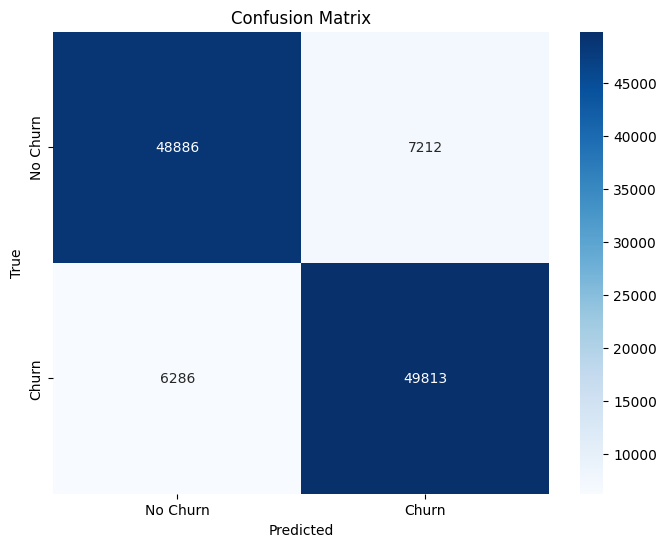

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True');

## Export the model

In [54]:
model.save("./model/BinaryClassifier.h5")